In [27]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization,\
    Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import image_dataset_from_directory

In [29]:
import argparse
import numpy as np
from keras.utils import image_dataset_from_directory
import os


In [30]:
os.environ['TF_CPP_MIN_LOG_LEVER'] = '2'

train_pth = 'data/train'
test_pth = 'data/test'

batch_size = 32
n_epoch = 20
n_epoch_FT = 25

train_gen = image_dataset_from_directory(
                train_pth,
                image_size=(300, 300),
                color_mode='grayscale',
                label_mode='categorical',
                batch_size=batch_size,
                smart_resize=1./255,
                shuffle=True
            )
test_gen = image_dataset_from_directory(
                test_pth,
                image_size=(300, 300),
                color_mode='grayscale',
                label_mode='categorical',
                batch_size=batch_size,
                smart_resize=1./255,
                shuffle=True
            )
n_train = 5216
n_test = 624

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [107]:
data_test = []
pred_test = []
for batch in test_gen:
    for sample in batch[0]:
        data_test.append(sample.numpy())
    for pred in batch[1]:
        pred_test.append(pred.numpy())
data_test = np.asarray(data_test)
pred_test = np.asarray(pred_test)

In [77]:
# creating multiple models for testing

model1 = Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(300, 300, 1), activation='relu'),
    AveragePooling2D(5, 5),
    Conv2D(64, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(2, 2),
    Conv2D(64, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(2, 2),
    Conv2D(128, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(2, 2),
    Conv2D(256, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(2, 2),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    
    Dense(2, activation='softmax')
])
model2 = Sequential([
    Conv2D(64, kernel_size=(3, 3), input_shape=(300, 300, 1), activation='relu'),
    AveragePooling2D(5, 5),
    Conv2D(64, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(5, 5),
    Conv2D(128, kernel_size=(3, 3),  activation='relu'),
    AveragePooling2D(2, 2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    
    Dense(2, activation='softmax')
])
model3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(300, 300, 1), activation='relu'),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(5, 5),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(5, 5),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')
])
model4 = Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(300, 300, 1), activation='relu'),
    AveragePooling2D(2, 2),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(2, 2),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(4, 4),
    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    AveragePooling2D(2, 2),
    
    
    
    Flatten(),

    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model1.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer=tf.optimizers.Adam(learning_rate=0.003),
             metrics=['accuracy'])
model2.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer=tf.optimizers.Adam(learning_rate=0.003),
             metrics=['accuracy'])
model3.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer=tf.optimizers.Adam(learning_rate=0.003),
             metrics=['accuracy'])
model4.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer=tf.optimizers.Adam(learning_rate=0.03),
             metrics=["accuracy"])
model5 = Sequential([
            Conv2D(32, kernel_size=(3, 3), input_shape=(300, 300, 1), activation='relu'),
            Conv2D(32, kernel_size=(3, 3), activation='relu'),
            Dropout(0.4),
            AveragePooling2D(6, 6),
            Conv2D(64, kernel_size=(3,3), activation='relu'),
            Dropout(0.4),
            AveragePooling2D(6, 6),
            Dropout(0.3),
            Conv2D(128, kernel_size=(3, 3)),
            MaxPooling2D(2, 2),

            Flatten(),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(2, activation='softmax')
        ])
model5.compile(loss=tf.losses.BinaryCrossentropy(),
             optimizer=tf.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])

models = [model1, model2, model3, model4, model5]

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 298, 298, 16)      160       
                                                                 
 average_pooling2d_130 (Aver  (None, 149, 149, 16)     0         
 agePooling2D)                                                   
                                                                 
 conv2d_183 (Conv2D)         (None, 147, 147, 32)      4640      
                                                                 
 average_pooling2d_131 (Aver  (None, 73, 73, 32)       0         
 agePooling2D)                                                   
                                                                 
 batch_normalization_19 (Bat  (None, 73, 73, 32)       128       
 chNormalization)                                                
                                                     

In [23]:
# model3 turned out to be the best fit
history3 = model3.fit(train_gen,
          validation_data=test_gen,
          steps_per_epoch=n_train // batch_size,
          validation_steps=n_test // batch_size,
          epochs=5)

Epoch 1/3
163/163 [==============================] - 132s 808ms/step - loss: 0.1975 - accuracy: 0.9300 - val_loss: 1.1068 - val_accuracy: 0.7582
Epoch 2/3
163/163 [==============================] - 132s 804ms/step - loss: 0.1939 - accuracy: 0.9293 - val_loss: 0.8392 - val_accuracy: 0.7599
Epoch 3/3
163/163 [==============================] - 133s 814ms/step - loss: 0.1704 - accuracy: 0.9367 - val_loss: 0.7230 - val_accuracy: 0.7747


In [79]:
history3_2 = model3.fit(train_gen,
          validation_data=test_gen,
          steps_per_epoch=n_train // batch_size,
          validation_steps=n_test // batch_size,
          epochs=3)

Epoch 1/3
163/163 [==============================] - 207s 1s/step - loss: 0.1663 - accuracy: 0.9337 - val_loss: 0.7250 - val_accuracy: 0.7549
Epoch 2/3
163/163 [==============================] - 217s 1s/step - loss: 0.1519 - accuracy: 0.9427 - val_loss: 0.7533 - val_accuracy: 0.7632
Epoch 3/3
163/163 [==============================] - 223s 1s/step - loss: 0.1501 - accuracy: 0.9438 - val_loss: 0.7145 - val_accuracy: 0.8010


In [80]:
model3.save_weights("weights80.h5")

In [91]:
info = pd.DataFrame(history3.history)

In [96]:
combo_accuracy=np.concatenate((history3.history['accuracy'],history3_2.history['accuracy']),axis=0)
combo_val_accuracy=np.concatenate((history3.history['val_accuracy'],history3_2.history['val_accuracy']),axis=0)

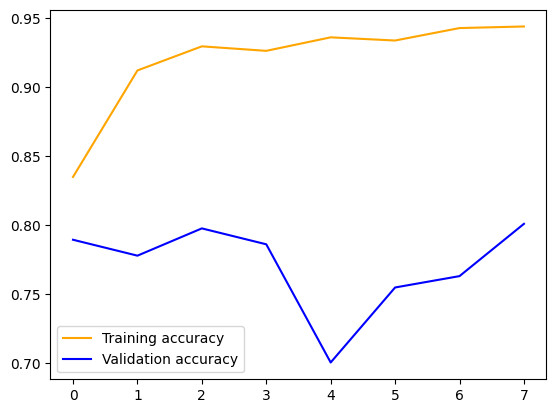

In [98]:
plt.plot(combo_accuracy, 'orange', label='Training accuracy')
plt.plot(combo_val_accuracy, 'blue', label='Validation accuracy')
plt.legend()

In [115]:
preds = model3.predict(data_test)

20/20 [==============================] - 6s 304ms/step


In [109]:
import itertools
from sklearn.metrics import confusion_matrix

In [135]:
def plot_conf(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Greens)
    fig.colorbar(cax)
    
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    ax.set(title="Confusion Matrix",
           xlabel="Predicted",
          ylabel="True",
          xticks=np.arange(2),
          yticks=np.arange(2),
          xticklabels=labels,
          yticklabels=labels)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    threshold = (cm.max() + cm.min())/2.
    for i, j in itertools.product(range(2), range(2)):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                size=text_size)
    

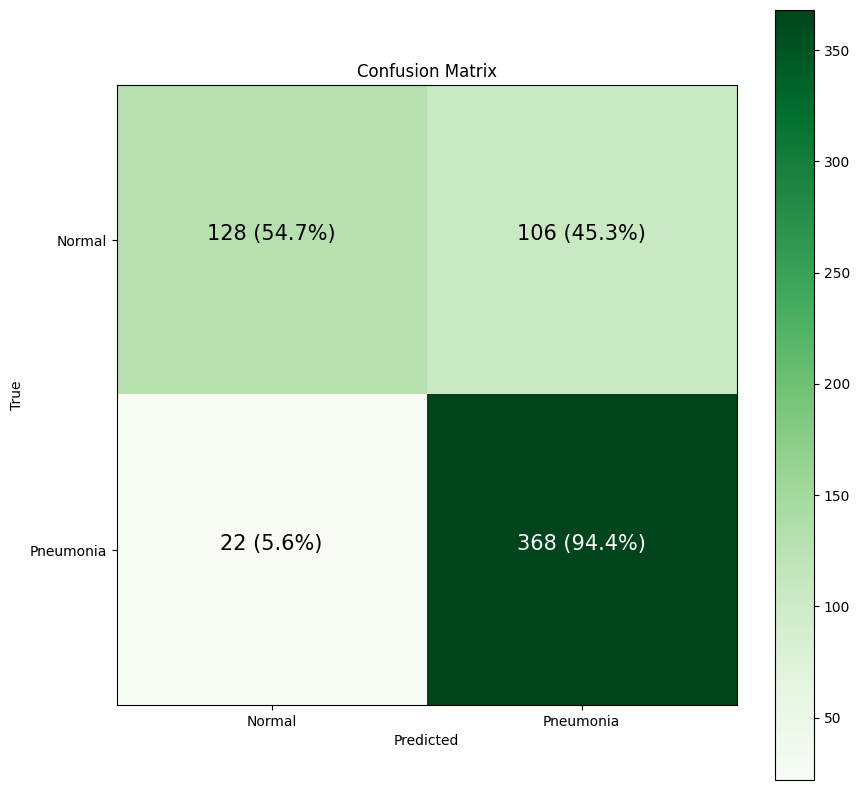

In [136]:
plot_conf(pred_test[:,1], np.round(preds[:,1]), classes=["Normal", "Pneumonia"])